In [ ]:
!wget http://shiftleft.com/mirrors/www.hpl.hp.com/india/research/penhw-resources/hpl-tamil-iso-char-offline-1.0.tar.gz
!tar -xvf ./hpl-tamil-iso-char-offline-1.0.tar.gz

Streaming output truncated to the last 5000 lines.
tamil_dataset_offline/usr_103/049t02.tiff
tamil_dataset_offline/usr_103/136t02.tiff
tamil_dataset_offline/usr_103/069t02.png
tamil_dataset_offline/usr_103/054t02.tiff
tamil_dataset_offline/usr_103/070t02.tiff
tamil_dataset_offline/usr_103/085t01.png
tamil_dataset_offline/usr_103/020t02.png
tamil_dataset_offline/usr_103/007t01.png
tamil_dataset_offline/usr_103/014t01.png
tamil_dataset_offline/usr_103/027t01.tiff
tamil_dataset_offline/usr_103/020t01.tiff
tamil_dataset_offline/usr_103/146t01.tiff
tamil_dataset_offline/usr_103/018t01.tiff
tamil_dataset_offline/usr_103/111t02.tiff
tamil_dataset_offline/usr_103/029t01.tiff
tamil_dataset_offline/usr_103/114t01.tiff
tamil_dataset_offline/usr_103/018t02.tiff
tamil_dataset_offline/usr_103/012t01.png
tamil_dataset_offline/usr_103/140t01.tiff
tamil_dataset_offline/usr_103/031t02.tiff
tamil_dataset_offline/usr_103/106t02.png
tamil_dataset_offline/usr_103/089t02.tiff
tamil_dataset_offline/usr_103/06

In [ ]:
import os
import pickle
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import shutil

In [ ]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()
def bbox(img1):
  img = 1 - img1
  rows = np.any(img, axis=1)
  cols = np.any(img, axis=0)
  rmin, rmax = np.where(rows)[0][[0, -1]]
  cmin, cmax = np.where(cols)[0][[0, -1]]
  return rmin, rmax, cmin, cmax
def getUniformImage(img):
    rmin, rmax, cmin, cmax = bbox(img)
    trimmedImg = img[rmin:rmax, cmin:cmax]
    resizedImg = cv2.resize(trimmedImg, dsize=(100, 100))
    paddedImg = np.ones((128,128))
    paddedImg[14:114,14:114] = resizedImg
    paddedImg = paddedImg.reshape(128, 128 , 1)
    return paddedImg

In [ ]:
images=[]
labels=[]
numCategory = 156
datasetsLoc = './tamil_dataset_offline/'
w,h = 128,128
i = 0
shapeL=[]

for folders in os.listdir(datasetsLoc):
    for files in  os.listdir(datasetsLoc+str(folders)):   
        if str(files) == 'Thumbs.db' or str(files) == 't03.tiff' or str(files) == '036t01.png':
          continue      
        # print(str(folders))
        indx = int(str(files)[:3])
        if indx < numCategory:        
            image = Image.open(datasetsLoc+str(folders)+'/'+str(files))
            img=np.asarray(image, dtype=np.uint8)
            shapeL.append(img.shape)
            img2 = getUniformImage(img)
            img2 = np.asarray(img2, dtype=np.uint8)
            images.append(img2)
            labels.append(indx)
        if i%8000 == 0:
            print(str(i)+ '  ' + str(len(labels)))
        i = i + 1
filIm = open('./image_ALL_128x128.obj', 'wb')
pickle.dump(images, filIm)
filLab = open('./label_ALL_128x128.obj', 'wb')
pickle.dump(labels, filLab)

0  1
8000  8001
16000  16001
24000  24001
32000  32001
40000  40001
48000  48001
56000  56001
64000  64001
72000  72001
80000  80001


In [ ]:
!cp /content/image_ALL_128x128.obj /content/drive/My\ Drive/wkDir/image_ALL_128x128.obj
!cp /content/label_ALL_128x128.obj /content/drive/My\ Drive/wkDir/label_ALL_128x128.obj

cp: cannot create regular file '/content/drive/My Drive/wkDir/image_ALL_128x128.obj': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/wkDir/label_ALL_128x128.obj': No such file or directory


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/image_ALL_128x128.obj /content/drive/My\ Drive/wkDir

In [ ]:
!cp /content/label_ALL_128x128.obj /content/drive/My\ Drive/wkDir

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import csv
import pickle
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
w, h = 128, 128
numCategory = 156
filIm = open('/content/drive/My Drive/wkDir/image_ALL_128x128.obj', 'rb')
images = pickle.load(filIm)
filLab = open('/content/drive/My Drive/wkDir/label_ALL_128x128.obj', 'rb')
labels = pickle.load(filLab)

In [ ]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()

In [5]:
tamilCharacterCode = []
w,h=128,128
with open('/content/drive/My Drive/wkDir/unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


In [ ]:
images=np.array(images)
labels=np.array(labels,dtype=np.uint8)
y_labels=to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)
print(X_train.shape, y_train.shape)

(55549, 128, 128, 1) (55549, 156)


ஷ


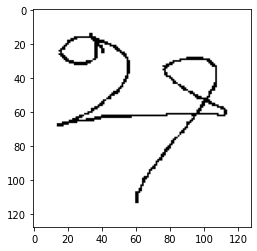

In [ ]:
ridx = np.random.randint(X_train.shape[0])
print(tamilCharacterCode[np.argmax(y_train[ridx])])
plotIm(X_train[ridx].reshape(w,h))

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(w,h,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(numCategory, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        2

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, verbose=1)
TrainAccuracy = model.evaluate(X_train, y_train, verbose=1)
TestAccuracy = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
556/556 [==============================] - 56s 79ms/step - loss: 2.4302 - accuracy: 0.4179 - val_loss: 0.8711 - val_accuracy: 0.7348
Epoch 2/20
556/556 [==============================] - 42s 76ms/step - loss: 0.7742 - accuracy: 0.7623 - val_loss: 0.5239 - val_accuracy: 0.8372
Epoch 3/20
556/556 [==============================] - 42s 76ms/step - loss: 0.5430 - accuracy: 0.8275 - val_loss: 0.4239 - val_accuracy: 0.8637
Epoch 4/20
556/556 [==============================] - 44s 79ms/step - loss: 0.4459 - accuracy: 0.8552 - val_loss: 0.3833 - val_accuracy: 0.8814
Epoch 5/20
556/556 [==============================] - 44s 79ms/step - loss: 0.3782 - accuracy: 0.8749 - val_loss: 0.3325 - val_accuracy: 0.8956
Epoch 6/20
556/556 [==============================] - 44s 79ms/step - loss: 0.3379 - accuracy: 0.8878 - val_loss: 0.3203 - val_accuracy: 0.9012
Epoch 7/20
556/556 [==============================] - 44s 79ms/step - loss: 0.3059 - accuracy: 0.8970 - val_loss: 0.3210 - val_accuracy:

In [ ]:
model.save("/content/drive/My Drive/wkDir/tamilALLEzhuthukalKeras_Model.h5")
print("Saved model to disk")

Saved model to disk


In [8]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the image
img = Image.open('/content/drive/MyDrive/wkDir/ROI.png')

# Preprocess the image
img = img.resize((128, 128))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/wkDir/tamilALLEzhuthukalKeras_Model.h5')

# Pass the image through the model
output = model.predict(img)

# Get the top 3 predicted classes and their probabilities
top_classes = np.argsort(output[0])[-3:][::-1]
top_probs = output[0][top_classes]

# Print the top 3 predicted classes and their probabilities
for i in range(3):
    print(f"{tamilCharacterCode[top_classes[i]]}: {top_probs[i]}")

1/1 [==============================] - 0s 80ms/step
ா: 0.9987112283706665
ர: 0.0007150755845941603
ஈ: 0.0005518563557416201
